# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [1]:
#1
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Lisabyy/EDA/refs/heads/main/assignment/data/ForeignGifts_edu.csv'
df = pd.read_csv(file_path)

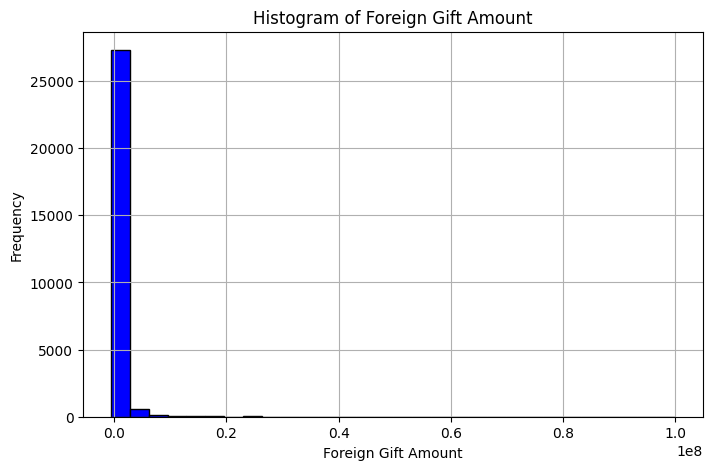

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


In [2]:
#2
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Foreign Gift Amount'], bins=30, color='blue', edgecolor='black')
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Foreign Gift Amount")
plt.grid(True)
plt.show()

# Describe the variable
print(df['Foreign Gift Amount'].describe())

2. The foreign gift amount is skewed to the right, with a mean of 5.882327e+05.

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


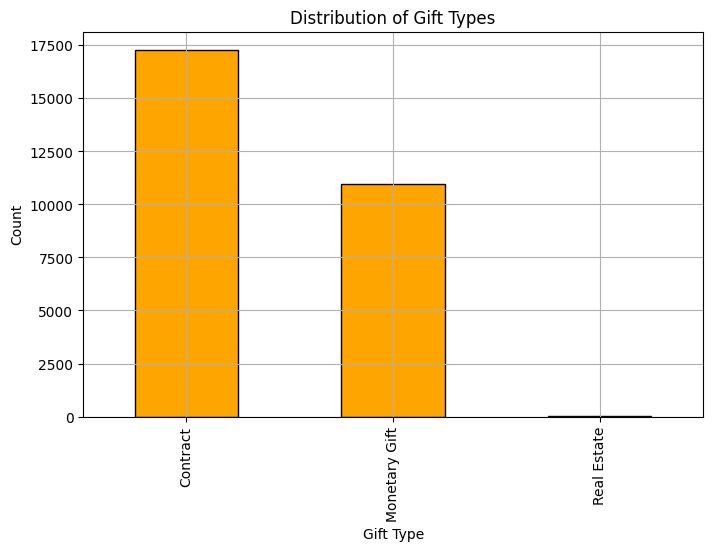

In [3]:
#3
# Value counts for Gift Type
gift_type_counts = df['Gift Type'].value_counts()
print(gift_type_counts)

# Calculate proportions
proportions = gift_type_counts / gift_type_counts.sum()
print(proportions)

# Plot histogram
gift_type_counts.plot(kind='bar', color='orange', edgecolor='black', figsize=(8, 5))
plt.xlabel("Gift Type")
plt.ylabel("Count")
plt.title("Distribution of Gift Types")
plt.grid(True)
plt.show()

3. Approximately 61.2% of the gifts are contracts, 38.8% are monetary gifts, and the rest 0.4% are real estate.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-4-f3c6768bd596>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Log Foreign Gift Amount'], shade=True, color='purple')


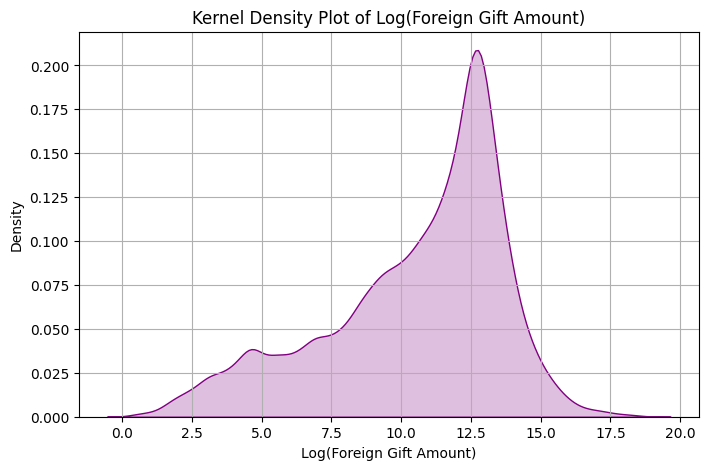

<ipython-input-4-f3c6768bd596>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', shade=True)


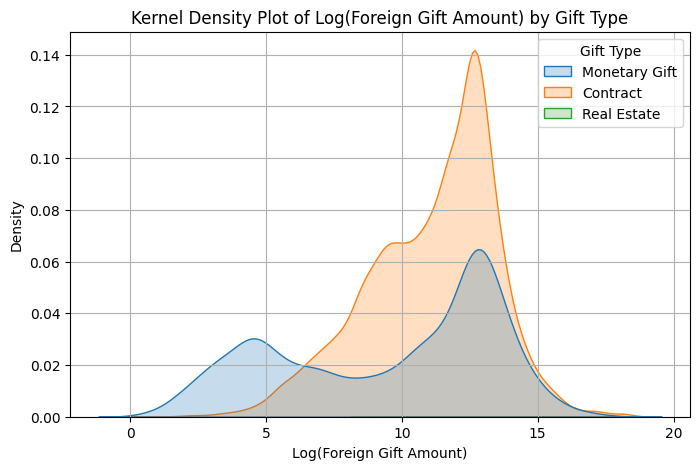

In [4]:
#4
import numpy as np
import seaborn as sns

# Add a log-transformed column
df['Log Foreign Gift Amount'] = np.log1p(df['Foreign Gift Amount'])

# Kernel density plot for log-transformed values
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Log Foreign Gift Amount'], shade=True, color='purple')
plt.xlabel("Log(Foreign Gift Amount)")
plt.title("Kernel Density Plot of Log(Foreign Gift Amount)")
plt.grid(True)
plt.show()

# Conditional KDE by Gift Type
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', shade=True)
plt.xlabel("Log(Foreign Gift Amount)")
plt.title("Kernel Density Plot of Log(Foreign Gift Amount) by Gift Type")
plt.grid(True)
plt.show()

4. Based on the two plots, there is evidence of clustering as the merged Kernel Density plot by gift type would be approximately the same as the Kernel Density plot of the total foreign gift amount.

In [7]:
#5
# Top 15 countries by number of gifts
top_countries_count = df.groupby('Country of Giftor')['Foreign Gift Amount'].count().nlargest(15)
print(top_countries_count)

# Top 15 countries by total amount
top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print(top_countries_amount)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


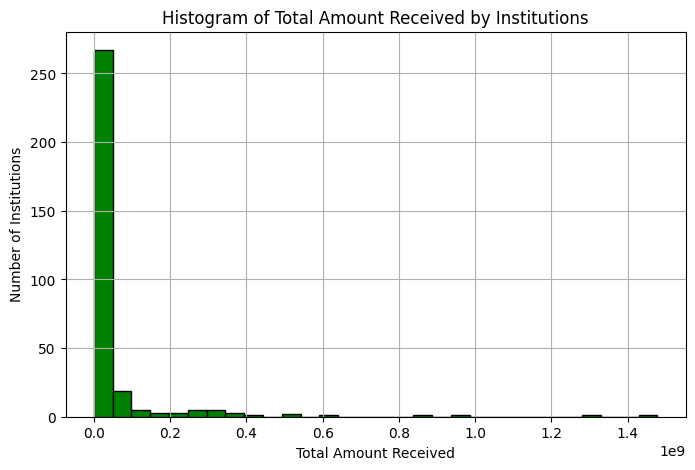

In [9]:
#6
# Top 15 institutions by total amount
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
print(top_institutions)

# Plot the total amount received by all institutions
total_per_institution = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.figure(figsize=(8, 5))
plt.hist(total_per_institution, bins=30, color='green', edgecolor='black')
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.title("Histogram of Total Amount Received by Institutions")
plt.grid(True)
plt.show()

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


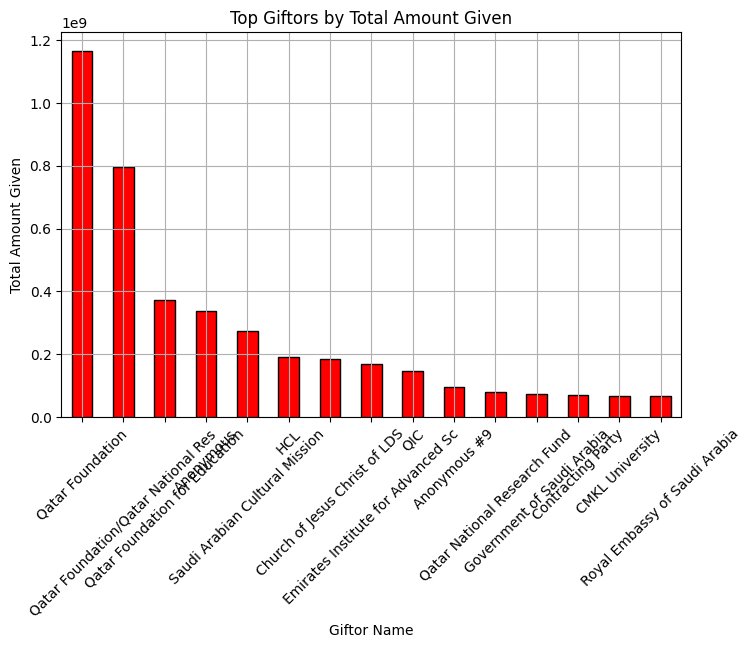

In [10]:
#7
# Top giftors by total amount
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
print(top_giftors)

# Plot top giftors
top_giftors.plot(kind='bar', color='red', edgecolor='black', figsize=(8, 5))
plt.xlabel("Giftor Name")
plt.ylabel("Total Amount Given")
plt.title("Top Giftors by Total Amount Given")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [15]:
#1
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Lisabyy/EDA/refs/heads/main/assignment/data/airbnb_hw.csv'
df = pd.read_csv(file_path)

In [16]:
#2
# Examine dataset dimensions and variables
print("Dataset Dimensions:", df.shape)
print("Number of Observations:", df.shape[0])
print("Variables included:\n", df.columns)

# Display the first few rows
print(df.head())

Dataset Dimensions: (30478, 13)
Number of Observations: 30478
Variables included:
 Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

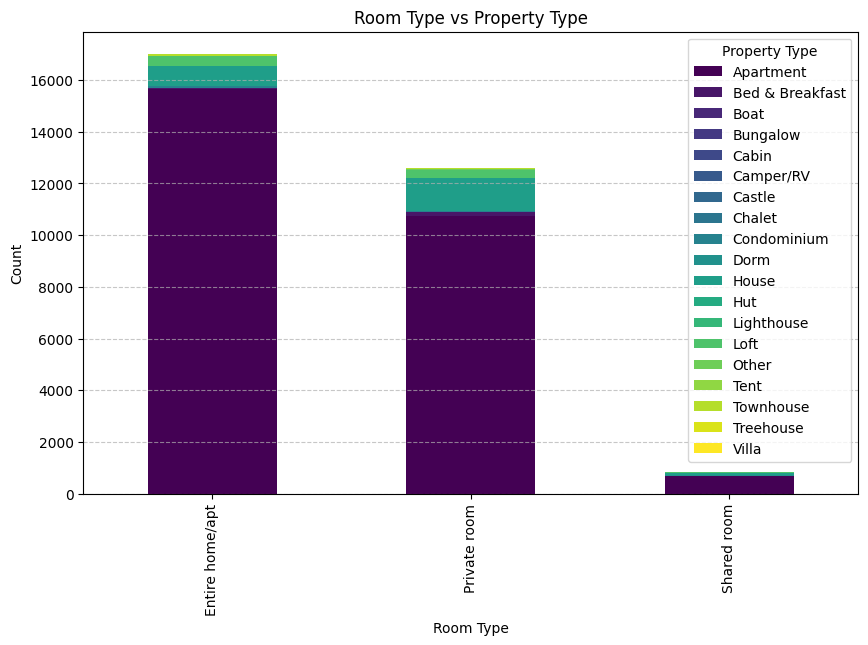

In [17]:
#3
# Cross-tabulation of Room Type and Property Type
room_property_ct = pd.crosstab(df['Room Type'], df['Property Type'])
print(room_property_ct)

# Visualize cross-tabulation
room_property_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Room Type vs Property Type")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.legend(title="Property Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3. Apartment is the predominant property type across all kinds of rooms for rental. For Bed & Breakfast, Castle, Chalet, Dorm, House, Hut, Tent, Treehouse, and other property types, private rooms are more common than renting the entire property.



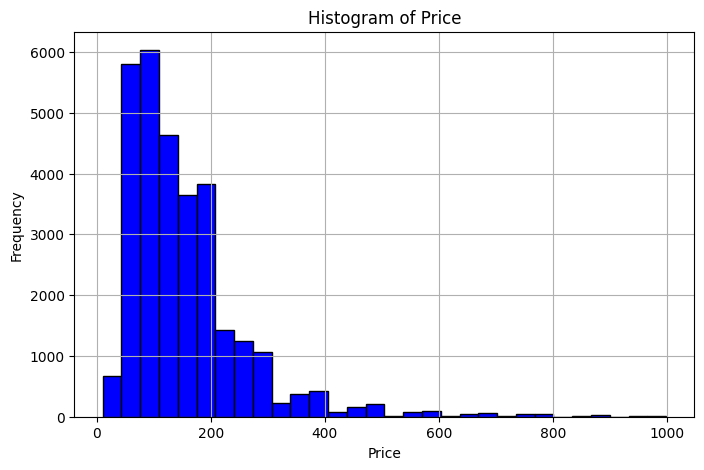

<ipython-input-19-f7c5901e59b7>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True, color='purple')


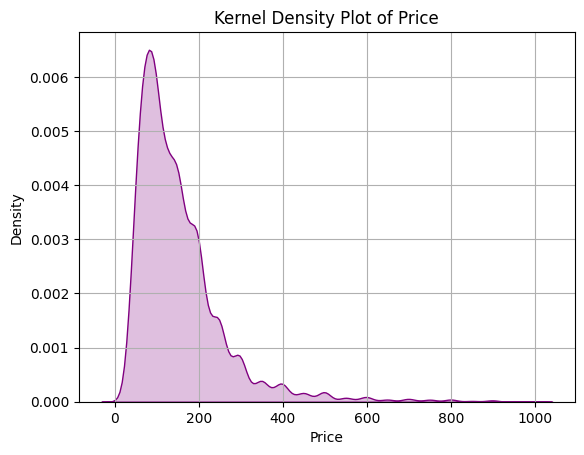

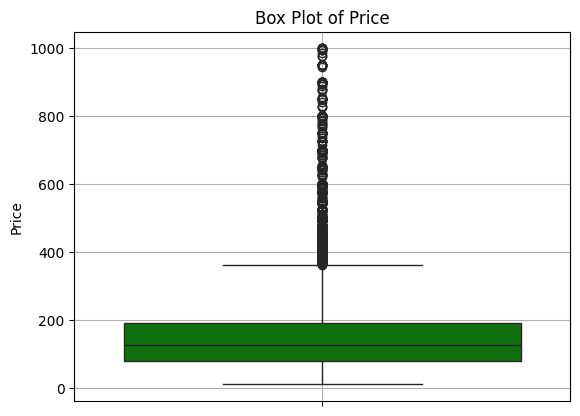

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


In [19]:
#4
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Price' to numeric, handling errors
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Price'], bins=30, color='blue', edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.grid(True)
plt.show()

# Kernel Density
sns.kdeplot(df['Price'], shade=True, color='purple')
plt.xlabel("Price")
plt.title("Kernel Density Plot of Price")
plt.grid(True)
plt.show()

# Box Plot
sns.boxplot(df['Price'], color='green')
plt.title("Box Plot of Price")
plt.grid(True)
plt.show()

# Statistical Description
print(df['Price'].describe())

4. Based on the histogram, Kernel Density plot, and box plot, the data is largely skewed to the right, leaving more outliers towards the end of the percentile distribution of the data.

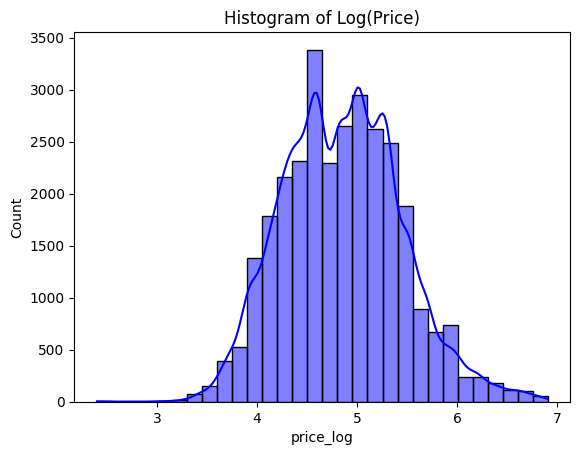

<ipython-input-20-fc4c4ee44631>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price_log'], shade=True, color='purple')


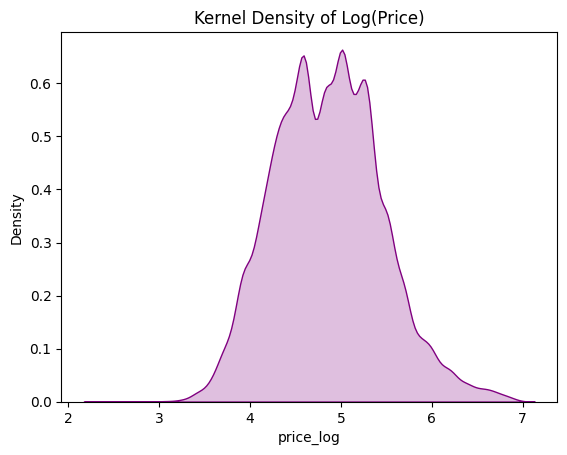

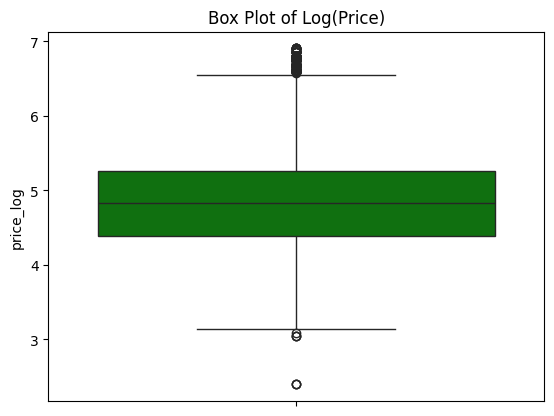

count    30297.000000
mean         4.854625
std          0.591928
min          2.397895
25%          4.394449
50%          4.836282
75%          5.262690
max          6.907755
Name: price_log, dtype: float64


In [20]:
#4
import numpy as np

# Add log-transformed price
df['price_log'] = np.log1p(df['Price'])

# Repeat histogram, KDE, and boxplot for `price_log`
sns.histplot(df['price_log'], bins=30, kde=True, color='blue')
plt.title("Histogram of Log(Price)")
plt.show()

sns.kdeplot(df['price_log'], shade=True, color='purple')
plt.title("Kernel Density of Log(Price)")
plt.show()

sns.boxplot(df['price_log'], color='green')
plt.title("Box Plot of Log(Price)")
plt.show()

# Statistical Description
print(df['price_log'].describe())

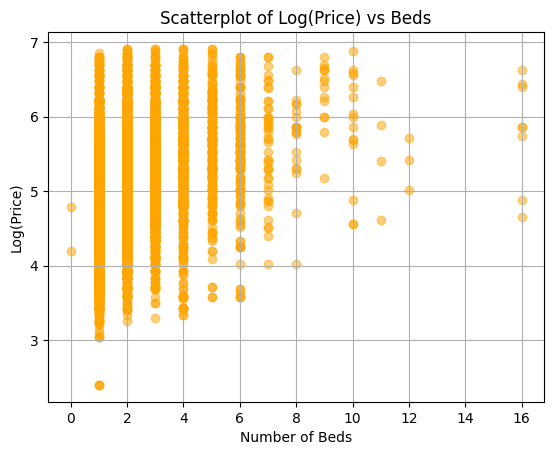

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

In [21]:
#5
# Scatterplot
plt.scatter(df['Beds'], df['price_log'], alpha=0.5, color='orange')
plt.xlabel("Number of Beds")
plt.ylabel("Log(Price)")
plt.title("Scatterplot of Log(Price) vs Beds")
plt.grid(True)
plt.show()

# Groupby Analysis
bed_stats = df.groupby('Beds')['Price'].describe()
print(bed_stats)

The price_logs are much more clustered at smaller number of beds. The average price increases with the increase in the number of beds. And the standard deviation doesn't seem to follow a fixed pattern of change throughout the different number of beds.

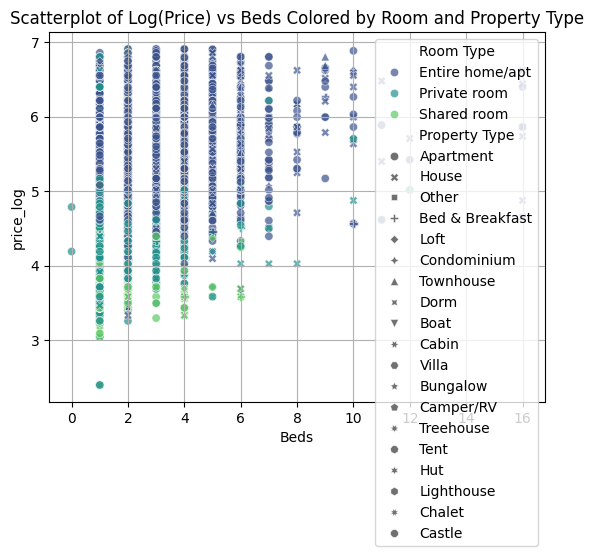

                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

In [22]:
#6
# Scatterplot with coloring
sns.scatterplot(data=df, x='Beds', y='price_log', hue='Room Type', style='Property Type', palette='viridis', alpha=0.7)
plt.title("Scatterplot of Log(Price) vs Beds Colored by Room and Property Type")
plt.grid(True)
plt.show()

# Groupby for Room Type and Property Type
room_property_stats = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(room_property_stats)

Entire home/apt would generally have higher prices than private room and shared room. Entire home/apt of other property type seems to have the highest prices on average. The same type also have the highest standard deviation. The median appears to be a more reliable estimate of central tendency as the values are more standardized around the central tendency.

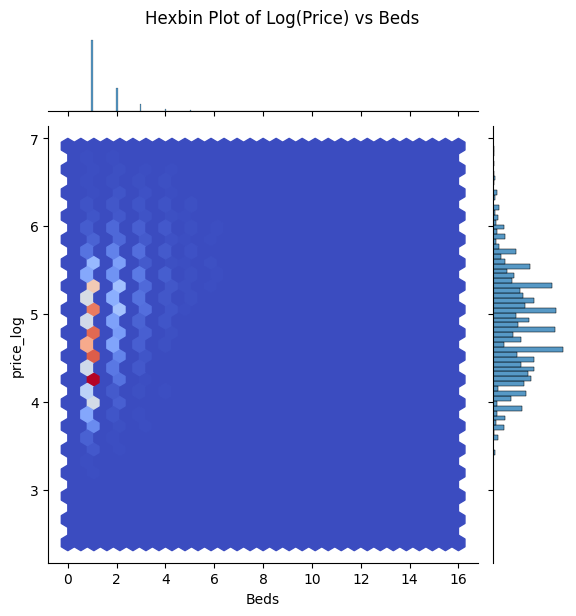

In [23]:
#7
# Jointplot with Hexbins
sns.jointplot(data=df, x='Beds', y='price_log', kind='hex', gridsize=30, cmap='coolwarm')
plt.suptitle("Hexbin Plot of Log(Price) vs Beds", y=1.02)
plt.show()

The data is densely concentrated where the number of beds is 1 or 2. And scatterplots in 5 and 6 can be misleading as it's hard to identify the clusters or patterns in those plots.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [2]:
#1
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Lisabyy/EDA/refs/heads/main/assignment/data/drilling_rigs.csv'
df = pd.read_csv(file_path)

# Examine the dataset
print("Number of Observations:", df.shape[0])
print("Number of Variables:", df.shape[1])
print("Dataset Columns:\n", df.columns)

# Display the first few rows
print(df.head())

# Check data types
print(df.dtypes)

Number of Observations: 623
Number of Variables: 10
Dataset Columns:
 Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')
           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oi

In [5]:
#2
# Convert Month to datetime
df['time'] = pd.to_datetime(df['Month'], format='mixed')

# Check for missing or non-numeric values in other columns
print(df.isnull().sum())
print(df.describe())

Month                                                                                           0
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    0
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   0
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                      0
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                    0
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)      0
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)     0
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)        0
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      0
Active Well Service Rig Count (Number of Rigs)                                                 32
time                

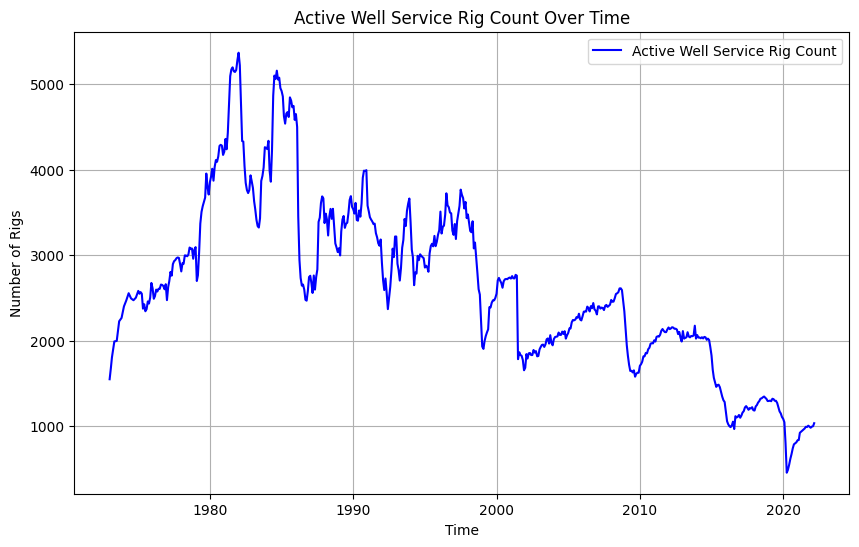

In [6]:
#3
import matplotlib.pyplot as plt

# Line plot of Active Well Service Rig Count
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'], color='blue', label='Active Well Service Rig Count')
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.title("Active Well Service Rig Count Over Time")
plt.grid(True)
plt.legend()
plt.show()

The active well servie rig count decreases over time, with the peak during 1980-1990.

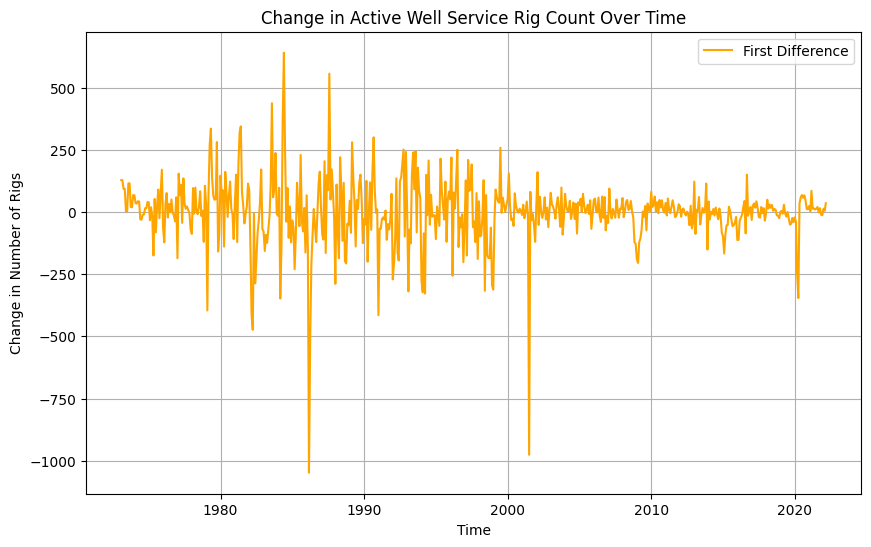

In [7]:
#4
# Compute first difference
df['rig_count_diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

# Line plot of first difference
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['rig_count_diff'], color='orange', label='First Difference')
plt.xlabel("Time")
plt.ylabel("Change in Number of Rigs")
plt.title("Change in Active Well Service Rig Count Over Time")
plt.grid(True)
plt.legend()
plt.show()

The change in active well service rig count fluctuates throughout time, with the most significant changes happening during 1980-1990 and early 2000. The change becomes smaller towards 2020.

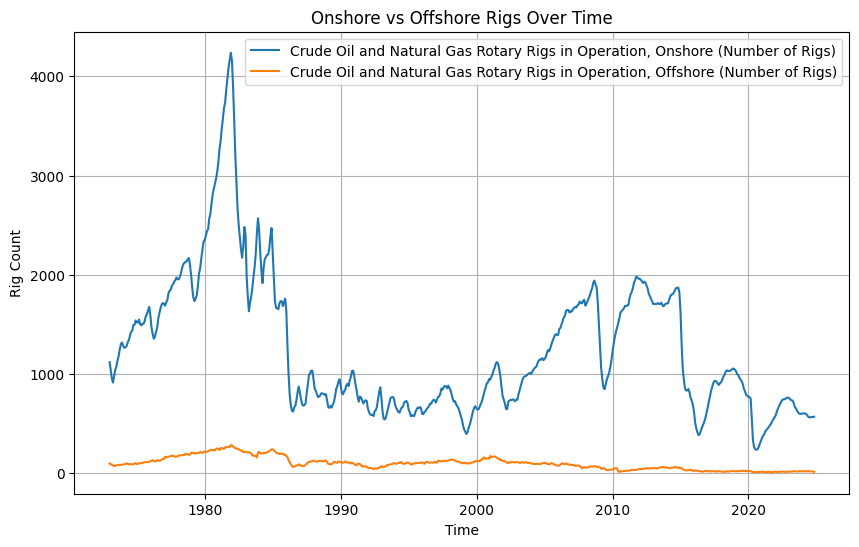

In [10]:
#5
# Melt the first two columns (assume they are Onshore and Offshore rig counts)
melted_df = pd.melt(df, id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                    var_name='Rig Type', value_name='Rig Count')

# Plot the resulting series
plt.figure(figsize=(10, 6))
for rig_type in melted_df['Rig Type'].unique():
    subset = melted_df[melted_df['Rig Type'] == rig_type]
    plt.plot(subset['time'], subset['Rig Count'], label=rig_type)

plt.xlabel("Time")
plt.ylabel("Rig Count")
plt.title("Onshore vs Offshore Rigs Over Time")
plt.legend()
plt.grid(True)
plt.show()